# Ejercicio 3: Predicción del precio de casas – Regresión supervisada

En este ejercicio abordaremos un problema de regresión supervisada usando un dataset real: el California Housing Dataset: 
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

**1) Exploración y preprocesamiento:**


In [1]:
# Importar librerías
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = fetch_california_housing(as_frame=True)
df = data.frame
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


**Explora los datos:**


* ¿Cuántas observaciones y variables hay?
  
Son 20640 observaciones, con 8 variables que describen los datos.

`MedInc` → Ingreso medio de los residentes en la zona (en decenas de miles de dólares).

`HouseAge` → Edad promedio de las casas en la zona. 

`AveRooms` → Promedio de habitaciones por vivienda en la zona.

`AveBedrms` → Promedio de dormitorios por vivienda en la zona.

`Population` → Cantidad total de habitantes en la zona.

`AveOccup` → Promedio de ocupantes por vivienda en la zona.

`Latitude` → Latitud de la ubicación (posición geográfica).

`Longitude` → Longitud de la ubicación (posición geográfica).

`MedHouseVal` → Valor medio de las casas en la zona (variable objetivo).


* ¿Cuál es la variable objetivo (target)?
La variable objetivo, es decir, la variable que queremos predecir, sería MedHouseVal, esta nos permitiría analizar por ejemplo, a evaluar el mercado inmobiliario y realizar planificaciones.

* ¿Hay valores faltantes?


In [9]:
# Ver cuántos valores faltantes hay en cada columna
print("Valores faltantes por columna:\n", df.isnull().sum())
print("\nValores cero por columna:\n", (df == 0).sum())  # Detecta cuántos ceros hay en cada columna


Valores faltantes por columna:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Valores cero por columna:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


No hay valores nulos, ni con valor cero, por lo que no hace falta realizar medidas al respecto.

* Analiza la distribución de las variables con df.describe() y visualizaciones.

In [11]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# Análisis de los Histogramas del Dataset de Viviendas de California

`HouseAge` (Edad promedio de las casas en la zona)

Las edades de las casas tienen una distribución que va desde 1 año hasta 52 años, sin una tendencia muy clara de cocncentración, la información parece estar bastante distribuida en todas las edades.

`AveRooms` (Promedio de habitaciones por vivienda en la zona)

Muestra una distribución totalmente concentrada al lado izquierdo, la mayoria de viviendas tiene 4 a 6 habitaciones, sin embargo tambien hay valores bastante altos de hasta 141 habitaciones, esto podría implicar que existen valores atipicos en el dataset.

`AveBedrms` (Promedio de dormitorios por vivienda en la zona)

En promedio hay 1 dormitorio en las viviendas, esta muestra una distribución concentrada al lado izquierdo por lo que la mayoria de viviendas tendrían al rededor de 1 dormitorio en la vivienda, sin embargo tambien hay valores bastante altos al igual que el caso anterior, como 34 dormitorios, implicando que probablemente existen valores atipicos en el dataset.


`Population` (Cantidad total de habitantes en la zona)

Tambien presenta una concentración de la distribución hacia la dereha, con poblaciones menores a 1000 habitantes, hasta mayores a 1700 habitantes, existiendo valores como máximo 35.682 habitantes, indicando nuevamente la existencia de valores atipicos altos en el dataset. 

`AveOccup` (Promedio de ocupantes por vivienda en la zona)

La cantidad de ocupantes por vivienda es desde 1 a 4 ocupantes, con casos extremos mayores a mil habitantes, estos casos podrían ser errores, o viviendas muy grandes como departamentos o similares.

`Latitude` Latitud de la ubicación (posición geográfica)

`Longitude` Longitud de la ubicación (posición geográfica).

`MedHouseVal` Valor medio de las casas en la zona 



Copilot:

7. Latitude/Longitude (Ubicación geográfica)
- **Distribución**: No uniforme, refleja geografía de California
- **Interpretación**:
  - Picos en latitudes ~34°N y ~38°N (áreas metropolitanas)
  - Longitudes muestran concentración cerca de la costa (-118° a -122°)
- **Implicación**: Los valores de propiedad varían por ubicación

8. MedHouseVal (Valor medio de vivienda)
- **Distribución**: Probablemente multimodal
- **Interpretación**:
  - Picos alrededor de 0.5-1.5, 2.0-2.5 y 4.5-5.0
  - Indica diferentes "niveles" de mercado inmobiliario
- **Implicación**: Existencia de distintos segmentos de vivienda

 1. MedInc (Ingreso medio)
- **Distribución**: Probablemente asimétrica a la derecha
- **Interpretación**: 
  - La mayoría de distritos tienen ingresos medios bajos (2-5 unidades)
  - Pocos distritos con ingresos muy altos (>8 unidades)
- **Implicación**: Existe desigualdad económica entre distritos


 Hallazgos clave:
1. **Problemas de calidad de datos**: Variables como AveOccup y AveRooms muestran valores imposibles que requieren limpieza
2. **Desigualdades económicas**: MedInc y MedHouseVal muestran distribuciones desiguales
3. **Segmentación natural**: Algunas variables sugieren la existencia de subgrupos naturales en los datos
4. **Relación geográfica**: Las coordenadas muestran patrones espaciales claros


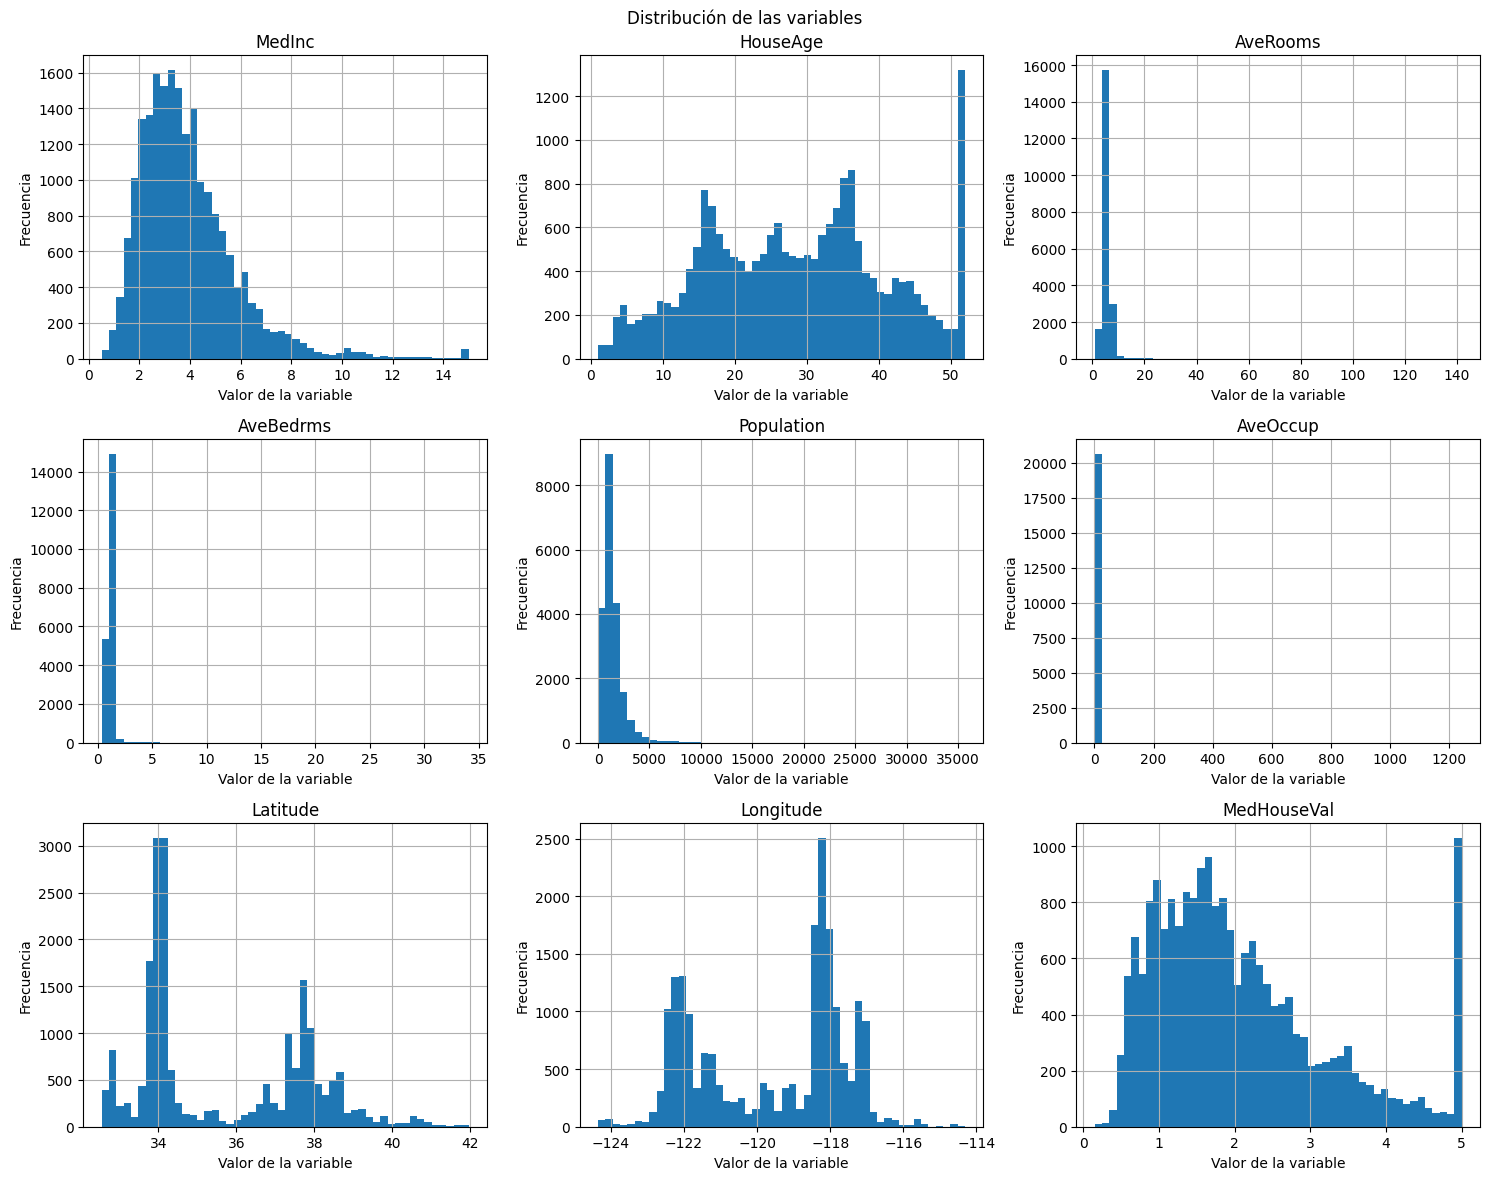

In [21]:
# Crea histogramas para todas las columnas numéricas del DataFrame

df.hist(bins=50, figsize=(15,12)) # bins=50: Especifica el número de barras (contenedores) que tendrá cada histograma
plt.suptitle("Distribución de las variables")
for ax in plt.gcf().axes:  # Recorre cada gráfico individual
    ax.set_xlabel("Valor de la variable")  # Eje X representa los valores de cada columna
    ax.set_ylabel("Frecuencia")  # Eje Y representa cuántas veces aparece cada valor
plt.tight_layout()
plt.show()

**Preprocesamiento:**


Aplica escalado (por ejemplo, StandardScaler) a las características numéricas.

In [3]:
from sklearn.preprocessing import StandardScaler

viviendas_E = StandardScaler().fit_transform(df)


**2) División de los datos**

Divide el dataset en conjuntos de:

Entrenamiento (60%)


Validación (20%)


Test (20%)


Usa train_test_split() dos veces para lograr esta división.


In [4]:
from sklearn.model_selection import train_test_split

# Transformamos a un dataframe de pandas
viviendas = pd.DataFrame(viviendas_E, columns=df.columns)

X = viviendas.drop(columns=['MedHouseVal'])
y = viviendas['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

**3) Entrenamiento de modelos de regresión**

Entrena y evalúa los siguientes modelos con los conjuntos de entrenamiento y validación:

<h4>Modelo 1: Regresión Lineal</h4>


Ajusta un modelo lineal con LinearRegression.


¿Qué coeficientes obtiene para cada variable?



In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [19]:

# Modelo de regresión lineal
modelo_rl = LinearRegression()

# Entrenar modelo regresión lineal
modelo_rl.fit(X_train, y_train)

# Predecir con validación
y_pred_rl = modelo_rl.predict(X_val)

# Evaluar (para este caso, utilizaremos MAE)
mae_rl = mean_absolute_error(y_test, y_pred_rl)
print(f"MAE regresión lineal: {mae_rl} \n")
    
# Obtener coeficientes
print("Intercepto (b0):", modelo_rl.intercept_)
print("\nCoeficientes:\n")
for nombre, coef in zip(X_train.columns, modelo_rl.coef_):
    print(f"{nombre}: {coef:.4f}")


MAE regresión lineal: 0.9782717498475603 

Intercepto (b0): 0.001087554025765449

Coeficientes:

MedInc: 0.7501
HouseAge: 0.1038
AveRooms: -0.2894
AveBedrms: 0.3541
Population: -0.0082
AveOccup: -0.0333
Latitude: -0.7715
Longitude: -0.7464



**Intercepto:** Es el valor de MedHouseVal cuando todas las demás variables son 0.

Los **coeficientes positivos** resultantes del modelo fueron: 
* MedInc: Ingreso medio de los residentes (el valor más alto)
* HouseAge: Edad promedio de las casas
* AveBedrms: Promedio de dormitorios por vivienda
  
-> Cuando el valor de estas variables aumenta, MedHouseVal, es decir, el valor medio de las casas  también **aumenta**. El valor de MedInc nos indica que el ingreso medio de los residentes tiene el mayor impacto en los precios de las viviendas.

Los **coeficientes negativos** fueron:
* AveRooms: Promedio de habitaciones por vivienda 
* Population: Cantidad total de habitantes
* AveOccup: Promedio de ocupantes
* Latitude (el valor más negativo)
* Longitude

-> Cuando el valor de estas variables aumenta, MedHouseVal, es decir, el valor medio de las casas **disminuye**.
Curiosamente, contrario a lo esperado, viviendas con mayor cantidad de habitaciones no necesariamente son las más caras, por otro lado, tal como se suele pensar, la ubicación geográfica afecta significativamente el precio, esto podría deberse a que por ejemplo, viviendas más alejadas a ciudades sean más baratas.

<h4>Modelo 2: Regresión Polinómica</h4>
Usa PolynomialFeatures de grado 2 o 3.


¿Mejora el rendimiento respecto a la regresión lineal?


In [20]:
# Transformar variables para polinomial grado 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Entrenar regresión lineal con variables polinomiales
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Predecir
y_pred_poly = poly_reg.predict(X_test_poly)

# Evaluar (para este caso, utilizaremos MAE)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
print(f"MAE regresión polinómica: {mae_poly} \n")
print(f"MAE regresión lineal: {mae_rl} \n")

MAE regresión polinómica: 0.4093989751967993 

MAE regresión lineal: 0.9782717498475603 



Sabemos que para el error absoluto medio (MAE), los valores cercanos a cero indican un mejor desempeño, del resultado podemos observar que claramente **la regresión polinomial (RP) tiene un mejor rendimiento** respecto a la regresión lineal (RL), pues, RP obtuvo un MAE de 0.409, lo cual es significativamente menor que el 0.978 de la RL.

Este resultado es esperable sabiendo que la RP es mucho más flexible que RL, por lo que teniendo cuidado con el grado para evitar un sobreajuste, este pudo captar de mejor manera las relaciones entre las variables, que el otro modelo el cual no logra capturar relaciones no lineales.

##### Modelo 3: Árbol de decisión para regresión
Usa DecisionTreeRegressor con una profundidad máxima (max_depth) controlada.


¿El árbol sobreajusta o generaliza?


In [6]:
for depth in range(2, 16):
    arbol = DecisionTreeRegressor(max_depth=depth, random_state=42)
    arbol.fit(X_train, y_train)
    y_pred = arbol.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    print(f"max_depth={depth}: MAE={mae:.4f}")

max_depth=2: MAE=0.5678
max_depth=3: MAE=0.5283
max_depth=4: MAE=0.4864
max_depth=5: MAE=0.4556
max_depth=6: MAE=0.4280
max_depth=7: MAE=0.4044
max_depth=8: MAE=0.3882
max_depth=9: MAE=0.3766
max_depth=10: MAE=0.3673
max_depth=11: MAE=0.3618
max_depth=12: MAE=0.3641
max_depth=13: MAE=0.3658
max_depth=14: MAE=0.3707
max_depth=15: MAE=0.3745


Con esto podemos utilizar el metodo del codo, dando que el punto donde deja de disminuir y el MAE es menor seria en max_depth 11

In [8]:
mejor_arbol = DecisionTreeRegressor(max_depth=11, random_state=42)
mejor_arbol.fit(X_train, y_train)

# Predecir en el conjunto de test
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predicciones en entrenamiento y test
y_train_pred = mejor_arbol.predict(X_train)
y_test_pred = mejor_arbol.predict(X_test)

# Errores en entrenamiento
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Errores en test
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Entrenamiento:")
print(f"MAE: {mae_train:.4f}")
print(f"MSE: {mse_train:.4f}")
print(f"R²: {r2_train:.4f}")

print("\nTest:")
print(f"MAE: {mae_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"R²: {r2_test:.4f}")


Entrenamiento:
MAE: 0.2188
MSE: 0.1105
R²: 0.8889

Test:
MAE: 0.3657
MSE: 0.3227
R²: 0.6721


El modelo debido a que si se compara el de entrenamiendo con el de prueba, se puede ver que existe un poco de sobreajuste, pero a su vez el desempeño muestra un poco de generalizacion



-----------------

Modelo 4: Random Forest Regressor
Usa RandomForestRegressor con 100 árboles.


¿Reduce el error comparado con un solo árbol?


In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predecir en el conjunto de test
y_pred_rf = rf.predict(X_test)

# Calcular métricas
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest (100 árboles):")
print(f"MAE: {mae_rf:.4f}")
print(f"MSE: {mse_rf:.4f}")
print(f"R²: {r2_rf:.4f}")

# Solo un arbol
arbol_rf = DecisionTreeRegressor(max_depth=11, random_state=42)
arbol_rf.fit(X_train, y_train)

# Predecir en el conjunto de test
y_pred_arbol_rf = arbol_rf.predict(X_test)

# Calcular métricas
mae_arbol_rf = mean_absolute_error(y_test, y_pred_arbol_rf)
mse_arbol_rf = mean_squared_error(y_test, y_pred_arbol_rf)
r2_arbol_rf = r2_score(y_test, y_pred_arbol_rf)

print("Árbol de Decisión (max_depth=11):")
print(f"MAE: {mae_arbol_rf:.4f}")
print(f"MSE: {mse_arbol_rf:.4f}")
print(f"R²: {r2_arbol_rf:.4f}")



Random Forest (100 árboles):
MAE: 0.2876
MSE: 0.1945
Árbol de Decisión (max_depth=11):
MAE: 0.3657
MSE: 0.3227


El uso de multiples arboles reduce el error considerablemente, osea qeu tiene una menor cantidad de errores



-----------------

### Modelo 5: Gradient Boosting Regressor

Usa GradientBoostingRegressor con parámetros por defecto.


¿Es el modelo más preciso?

In [13]:
gbs = GradientBoostingRegressor()
gbs.fit(X_train, y_train)
# Predecir en el conjunto de test
y_pred_gbs = gbs.predict(X_test)
# Calcular métricas
mae_gbs = mean_absolute_error(y_test, y_pred_gbs)
mse_gbs = mean_squared_error(y_test, y_pred_gbs)
r2_gbs = r2_score(y_test, y_pred_gbs)
print("Gradient Boosting:")
print(f"MAE: {mae_gbs:.4f}")
print(f"MSE: {mse_gbs:.4f}")
print(f"R²: {r2_gbs:.4f}")

Gradient Boosting:
MAE: 0.3190
MSE: 0.2174
R²: 0.7791


Debido a que el algoritmo gradient boosting regressor es el que tiene el menor error entre los distintos tipos de modelos, osea que tiene menor probabilidad de cometer errores cuando intenta predecir los valores

**4) Evaluación de los modelos**


Evalúa cada modelo con el conjunto de test utilizando las métricas de regresión:

MAE (Mean Absolute Error)


MSE (Mean Squared Error)


RMSE (Root Mean Squared Error)


R² (coeficiente de determinación)



`Muestra un resumen comparativo en una tabla o gráfico.`


In [14]:
def evaluar_modelo(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")

# print("Evaluación Regresión Lineal:")
# evaluar_modelo(y_test, y_pred_lin)
# print("\nEvaluación Regresión Polinomial grado 3:")
# evaluar_modelo(y_test, y_pred_poly)

<h4>Modelo 1: Regresión Lineal</h4>

In [21]:
print("Resultados regresión lineal\n")
evaluar_modelo(y_test, y_pred_rl)

Resultados regresión lineal

MSE: 1.6090
RMSE: 1.2685
MAE: 0.9783
R²: -0.6350


<h4>Modelo 2: Regresión Polinómica</h4>

In [22]:
print("Resultados regresión polinómica\n")
evaluar_modelo(y_test, y_pred_poly)

Resultados regresión polinómica

MSE: 0.4033
RMSE: 0.6351
MAE: 0.4094
R²: 0.5902


##### Modelo 3: Arbol de decision para regresion

In [15]:
print("Resultados árbol de decisión\n")
evaluar_modelo(y_test, y_test_pred)

Resultados árbol de decisión

MSE: 0.3227
RMSE: 0.5681
MAE: 0.3657
R²: 0.6721


##### Modelo 4: Random Forest Regressor

In [16]:
print("Resultados random forest\n")
evaluar_modelo(y_test, y_pred_rf)

Resultados random forest

MSE: 0.1945
RMSE: 0.4411
MAE: 0.2876
R²: 0.8023


##### Modelo 5: Gradient Boosting Regressor

In [17]:
print("Resultados gradient boosting\n")
evaluar_modelo(y_test, y_pred_gbs)

Resultados gradient boosting

MSE: 0.2174
RMSE: 0.4662
MAE: 0.3190
R²: 0.7791


| Modelo                  | MAE    | MSE    | RMSE   | R²    | Observacion |
|-------------------------|--------|--------|--------|-------|-------------|
| Regresión Lineal        | 0.9783 | 1.6090 | 1.2685 |-0.6350|             |
| Regresión Polinómica    | 0.4094 | 0.4033 | 0.6351 | 0.5902|             |
| Árbol de Decisión       | 0.3657 | 0.3227 | 0.5682 | 0.6721|             |
| Random Forest           | 0.2876 | 0.1945 | 0.4411 | 0.8023|             |
| Gradient Boosting       | 0.3190 | 0.2174 | 0.4662 | 0.7791|             |


**5) Análisis crítico y preguntas**

Responde con tus observaciones:

¿Qué modelo tuvo mejor desempeño? ¿Por qué?


¿Qué variables parecen más relevantes para explicar el precio de la vivienda?


¿Cuál modelo elegirías para explicar los resultados a un público general? ¿Por qué?


¿Hay signos de overfitting en algunos modelos?


¿Qué modelo ofrece el mejor compromiso entre interpretabilidad y precisión?